
# <span style="color:rgb(213,80,0)">Single\-shell acquisitions and AMURA</span>

This demo illustrates the basic use of the AMURA module, aimed at the analysis of single\-shell, HARDI like dMRI data sets.


In [1]:
addpath('..');
setup__DMRIMatlab_toolbox('useparallel',true); % Will be ingnored if you don't have a licensed copy of the parallel toolbox
clear;
close('all');


















You're running version 1.0 of the toolbox under octave 10.20
Using graphics toolkit: qt
    setup__DMRIMatlab_toolbox at line 85 column 9





## Load data

Load first your own sutiable multi\-shell dMRI data set, which should include the attenuation signal (DWI over the averaged baseline), the mask to remove the background, the gradients table, and the b\-values for each gradient direction:


In [2]:
tic;
load test_data.mat;
T=toc; % This is always a large piece of data
fprintf(1,'It took %f seconds to load data\n',T);
whos -file test_data.mat; % Check the variables loaded, their kinds, and their sizes
bshell = 3000;
pb = ( (bi<bshell+100) & (bi>bshell-100) ); % Keep just the selected shell
atti = atti(:,:,:,pb);
bi   = bi(pb,1);
gi   = gi(pb,:);





It took 1.190458 seconds to load data

Variables in the file test_data.mat:

variables in scope: test_data.mat

  Attr   Name        Size                     Bytes  Class
  ====   ====        ====                     =====  ===== 
         atti      101x110x17x256         193402880  single
         bi        256x1                       2048  double
         gi        256x3                       6144  double
         mask      101x110x17                188870  logical

Total is 48540614 elements using 193599942 bytes








## Compute standard measures... And more

In [3]:
rtop = atti2artop( atti, gi, bi, ...
    'clean', 90, ...
    'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'tau', 40.0e-3);
rtpp = atti2artpp( atti, gi, bi, ...
    'clean', 50, 'tensor', true, ...
    'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'tau', 40.0e-3);
rtap = atti2artap( atti, gi, bi, ...
    'clean', 50, 'tensor', true, ...
    'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'tau', 40.0e-3);
qmsd = atti2amura( atti, gi, bi, ...
    'type', 'qmsd', 'clean', 90, ...  % Full moments require more agressive outlier rejection
    'L', 8, 'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'tau', 40.0e-3);
msd = atti2amsd( atti, gi, bi, ...
    'L', 8, 'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'tau', 40.0e-3);
mua = atti2amura( atti, gi, bi, ...
    'type', 'a', 'nu', 1/2, 'clean', 50, ...
    'L', 8, 'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'tau', 40.0e-3);
pa = atti2apa( atti, gi, bi, ...
    'L', 8, 'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask, 'epsilon', 0.4);
ng = atti2ang( atti, gi, bi, ...
    'L', 8, 'lambda', 0.001, 'tl', 10*eps, 'tu', 1-10*eps, ...
    'mask', mask );

## Prepare the plots

In [4]:
mapType = 'high'; % Changing the colormap will trigger the entire demo
switch(mapType)
    case 'high'
        MAP = psychedelia(512);
    case 'gray'
        MAP = gray(512); % B/W colormap
    case 'default'
        MAP = parula(512);
end

## Plot the results

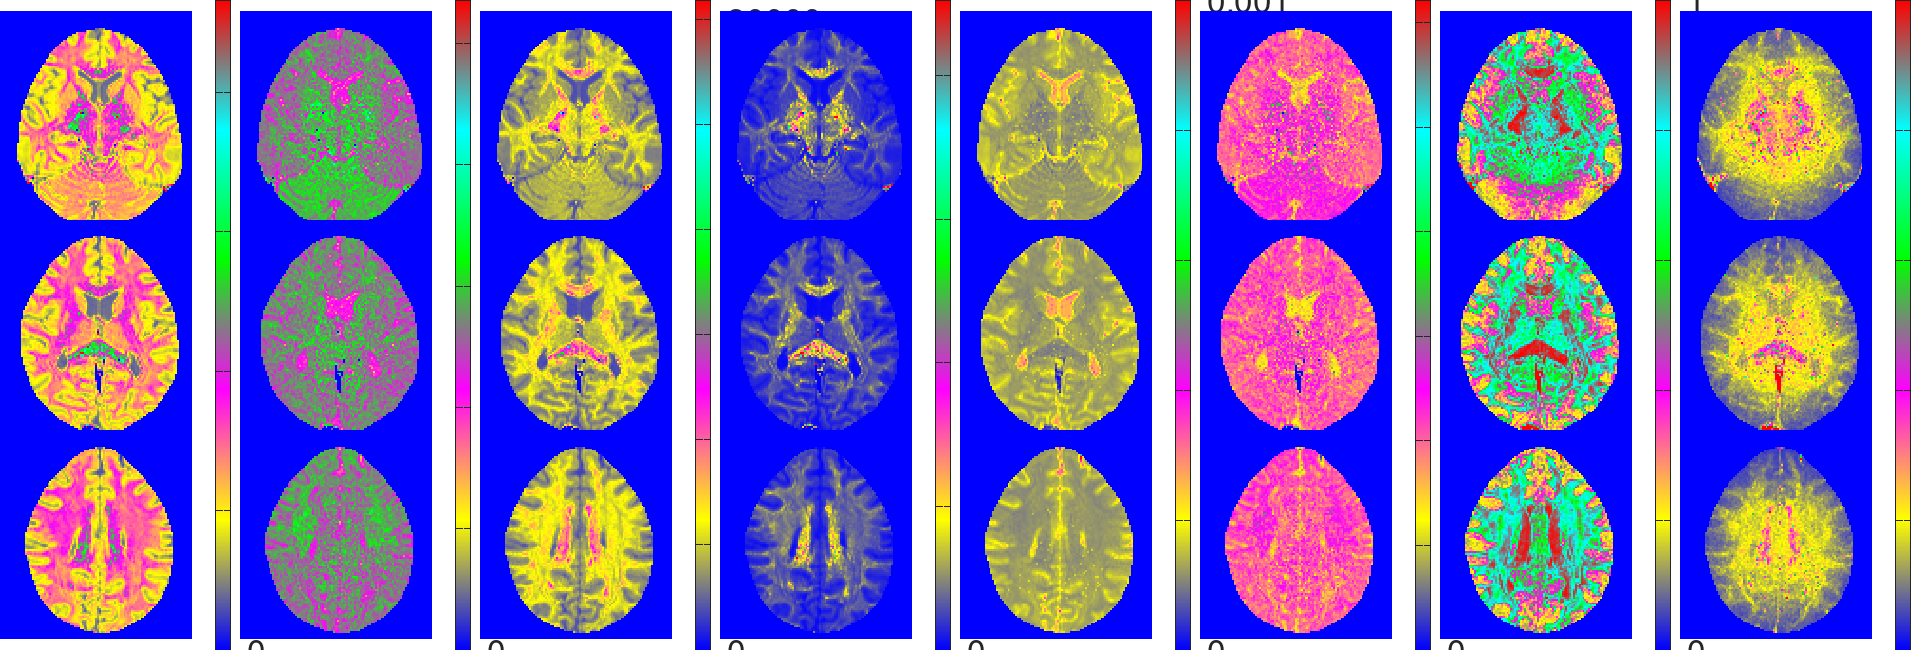

In [5]:
sl = [4,9,14];    % Slices to plot
close(figure(1)); % Close previous figures if needed
hf = figure(1);
set(hf,'Name','AMURA moments with single-shells','Position',[10,10,1920,650]);
R=1; C=8;
r=1; c=1; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([rtop(:,:,sl(1))';rtop(:,:,sl(2))';rtop(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('RTOP');
axis('equal');axis('off');axis('tight');
r=1; c=2; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([rtpp(:,:,sl(1))';rtpp(:,:,sl(2))';rtpp(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('RTPP');
axis('equal');axis('off');axis('tight');
r=1; c=3; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([rtap(:,:,sl(1))';rtap(:,:,sl(2))';rtap(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('RTAP');
axis('equal');axis('off');axis('tight');
r=1; c=4; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([qmsd(:,:,sl(1))';qmsd(:,:,sl(2))';qmsd(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('QMSD');
axis('equal');axis('off');axis('tight');
r=1; c=5; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([msd(:,:,sl(1))';msd(:,:,sl(2))';msd(:,:, ...
    sl(3))';],[0,1e-3]); colormap(MAP); colorbar; title('MSD');
axis('equal');axis('off');axis('tight');
r=1; c=6; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([mua(:,:,sl(1))';mua(:,:,sl(2))';mua(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('\Upsilon_a^{1/2}');
axis('equal');axis('off');axis('tight');
r=1; c=7; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([pa(:,:,sl(1))';pa(:,:,sl(2))';pa(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('PA');
axis('equal');axis('off');axis('tight');
r=1; c=8; subplot('Position',[(c-1)/C,(r-1)/R,1/C,1/R]);
imagesc([ng(:,:,sl(1))';ng(:,:,sl(2))';ng(:,:, ...
    sl(3))';]); colormap(MAP); colorbar; title('NG');
axis('equal');axis('off');axis('tight');